# **Predecir Ventas**

Instalaciones:
* pip install pandas
* pip install xlrd (para leer archivos de extension xls)
* pip install matplotlib
* pip install openpyxl
* pip install seaborn

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
df = pd.read_excel('../Data Original/VENTAS KERA TEIN.xls')
#df = df[['Fecha','Fecha entrega','Cant. pedida', 'Cant. pendiente', 'Cant. comprom.', 'Cant. remision', 'Cant. factura']]
df = df[['Fecha','Cant. pedida']]
df = df.sort_values(by='Fecha')


# Función para obtener el lunes anterior a una fecha dada
def obtener_lunes_anterior(fecha):
    # Calcular el lunes anterior
    lunes_anterior = fecha - pd.DateOffset(days=fecha.weekday())
    return lunes_anterior

df['LunesAnterior'] = df['Fecha'].apply(obtener_lunes_anterior)

# Establecer la columna 'Fecha' como el índice del DataFrame
df['FechaMes'] = df['Fecha'].dt.to_period('M').dt.to_timestamp()

df = df[['Fecha','LunesAnterior','FechaMes','Cant. pedida']]

In [16]:
df_dia = df.groupby('Fecha').agg({'Cant. pedida':'sum'}).reset_index()
df_semana = df.groupby('LunesAnterior').agg({'Cant. pedida':'sum'}).reset_index()
df_mes = df.groupby('FechaMes').agg({'Cant. pedida':'sum'}).reset_index()

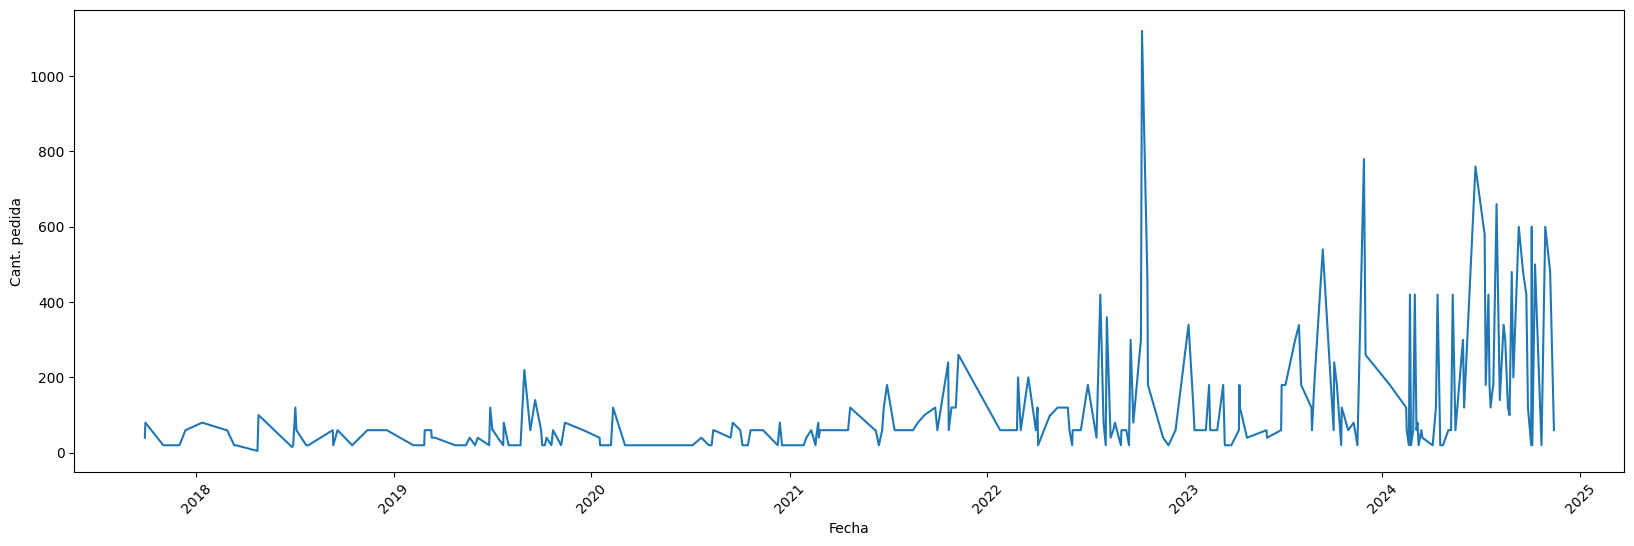

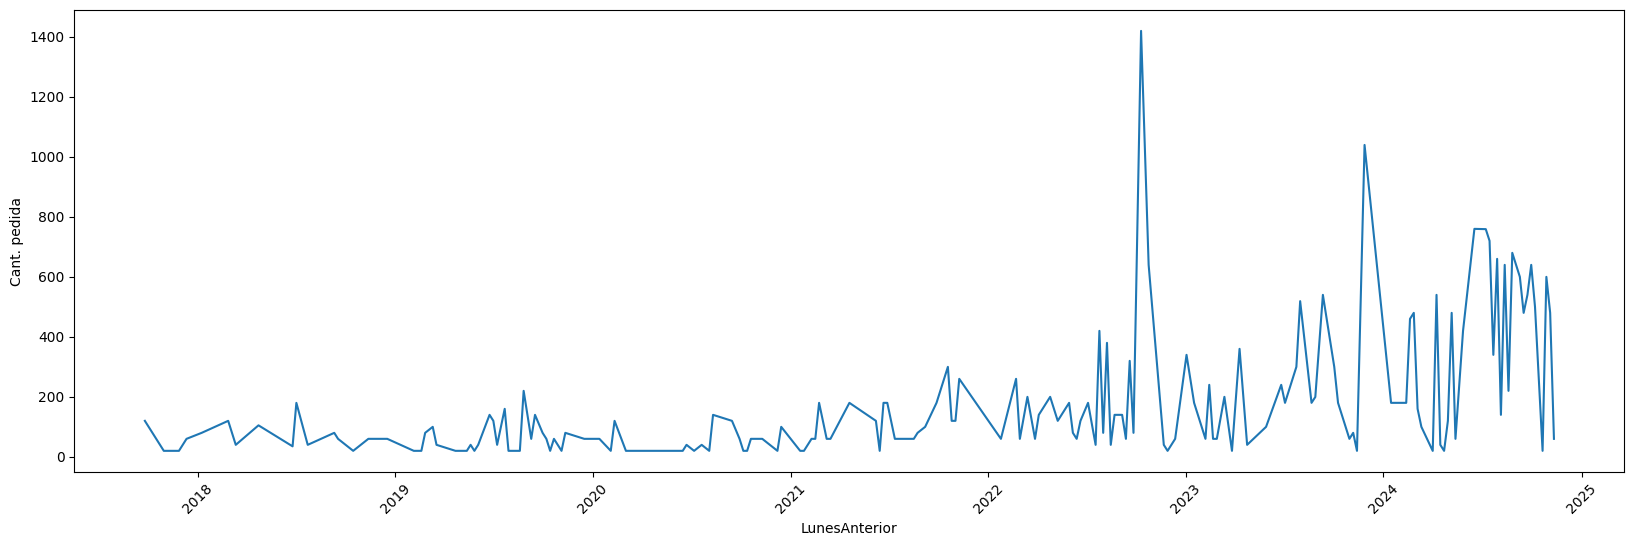

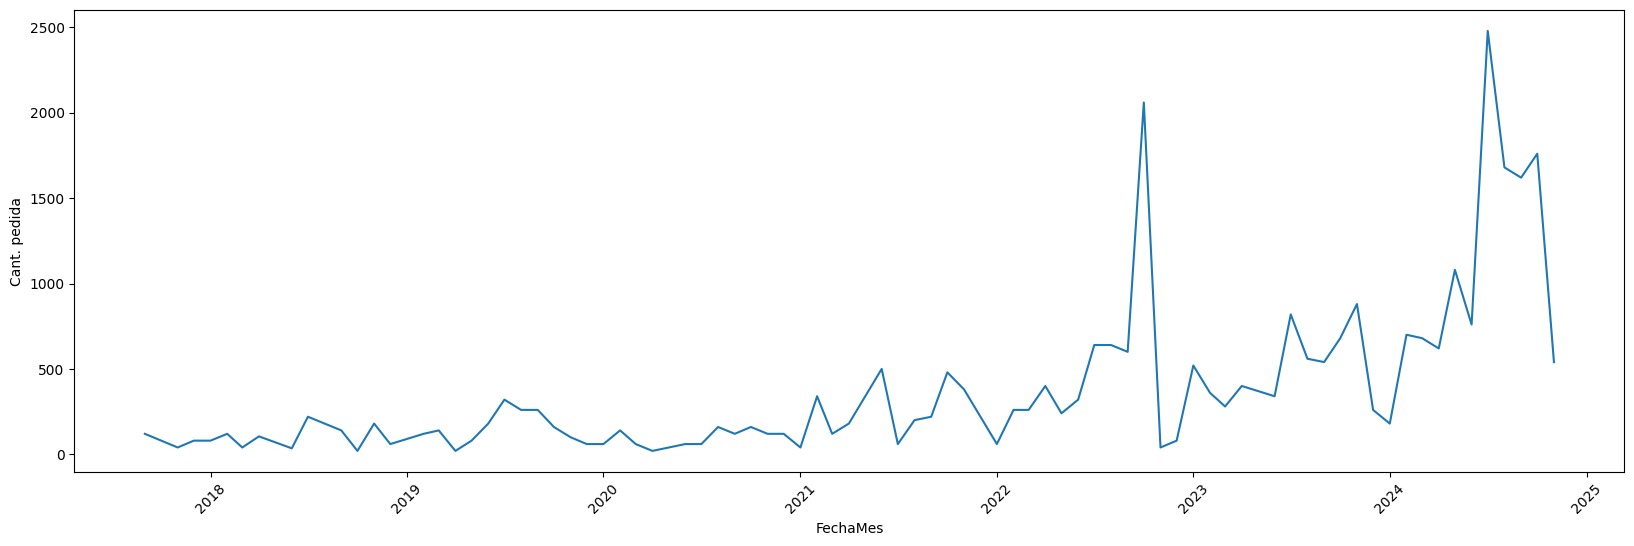

In [17]:
plt.figure(figsize=(20, 6))
sns.lineplot(x='Fecha', y='Cant. pedida', data=df_dia)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20, 6))
sns.lineplot(x='LunesAnterior', y='Cant. pedida', data=df_semana)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20, 6))
sns.lineplot(x='FechaMes', y='Cant. pedida', data=df_mes)
plt.xticks(rotation=45)
plt.show()

2024.11.13:  envié mensaje a Alejandro preguntando cuál era la explicación de esos picos de mediados del 2022 y de mediados del 2024.

DATA DISPONIBLE:
* el presupuesto del 2023 y 2024
* préstamos de MT entre clientes y SUMIQUIM (desde y hacia)
* Ventas de la MT 
    * Fecha (del pedido?)
    * Fecha entrega (o sea cuando fue entregado)
    * Cant. pedida
    * Cant. pendiente  (y donde quedan registradas las entregas parciales?  en este archivo parece que Cant. pendiente es lo pendiente actualizado?)
    * otras cantidades tales como comprometida (qué es?), en remisión (qué es?), de factura (o sea lo que realmente llegó al cliente?)

DATA SOLICITADA NO ENTREGADA
* descripción de los clientes (industria, etc..)
* pagos realizados por los clientes y moras
* lotes desde donde vinieron los productos
* como hay información de compras desde el 2017, solo llegó información de presupuestos del 2023 y 2024
* forecast de clientes de KERATINA?
* proveedores
* certificados de análisis (no hay por lote?)
* soporte técnico solicitado por los clientes de la kera tina

OTROS DATOS A INCLUIR
* precio de dólar
* IPC
* desempleo
* qué factores afectan la venta de los productos que usan la KERA TINA?


# **2.  lectura del data adicional**

* dólar

In [18]:
dfd = pd.read_csv('../Data Original/Datos históricos USD_COP.csv')

dfd['Fecha'] = pd.to_datetime(dfd['Fecha'], format='%d.%m.%Y')
dfd['Apertura']  = dfd['Apertura'].str.replace('.', '').str.replace(',', '.').astype(float)
dfd = dfd[['Fecha','Apertura']].copy()
dfd.dtypes

Fecha       datetime64[ns]
Apertura           float64
dtype: object

In [19]:
dfd.rename(columns={'Apertura':'Dolar'}, inplace=True)
dfd=dfd.sort_values(by='Fecha', ascending=True)
dfd.dtypes

Fecha    datetime64[ns]
Dolar           float64
dtype: object

* desempleo

In [35]:
dfdes = pd.read_excel('../Data Original/Desempleo.xlsx')
dfdes = dfdes[dfdes['Fecha']>='2016-01-01']
dfdes

,Fecha,Desempleo
180,2016-01-31,12.18
181,2016-02-29,10.37
182,2016-03-31,10.46
183,2016-04-30,9.32
184,2016-05-31,9.24
...,...,...
279,2024-04-30,10.65
280,2024-06-30,10.27
281,2024-07-31,9.92
282,2024-08-31,9.66


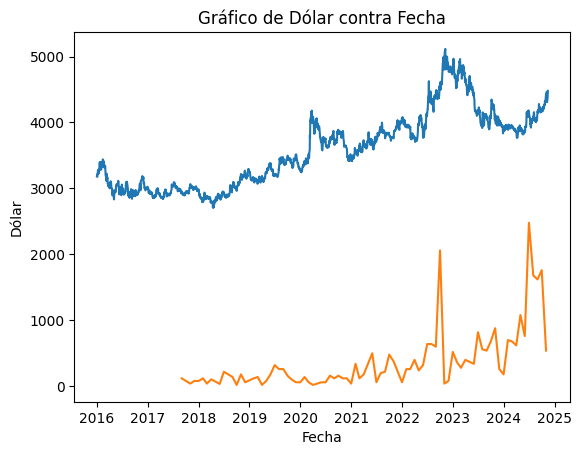

In [36]:
sns.lineplot(data=dfd, x='Fecha', y='Dolar')
sns.lineplot(x='FechaMes', y='Cant. pedida', data=df_mes)
plt.title('Gráfico de Dólar contra Fecha')
plt.xlabel('Fecha')
plt.ylabel('Dólar')
plt.show()

* tasa de deesempleo

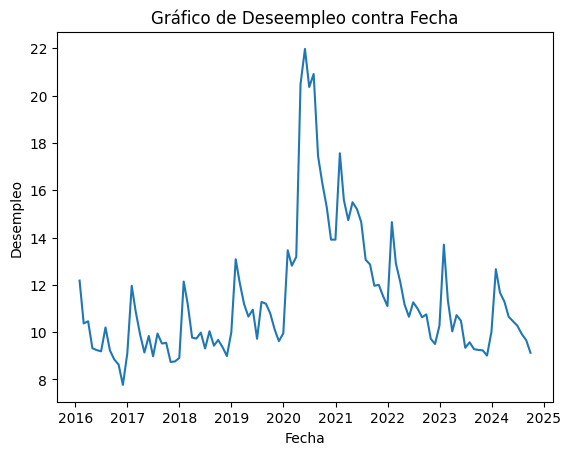

In [37]:
sns.lineplot(data=dfdes, x='Fecha', y='Desempleo')
plt.title('Gráfico de Deseempleo contra Fecha')
plt.xlabel('Fecha')
plt.ylabel('Desempleo')
plt.show()